<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/Convolu%C3%A7%C3%B5es_e_Morfologia_matem%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolução genérica

Operação de convolução é:
- A soma dos resultados da multiplicação de cada elemento da
matriz com a região da imagem sob a mesma;
- A subseqüente substituição do valor do pixel sobre o qual a matriz
foi aplicada por este resultado

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

class Pixel:
    def __init__(self, x, y):
      self.x = x
      self.y = y

 
def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()
 
def gray_tone(array):
  return (array[0] * 0.299 + array[1] * 0.587 + array[2] * 0.114)
 
def image_cinza(imagem):
  new_img = imagem
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      new_img[index_img][index_pixel] = gray_tone(pixel)
  return new_img

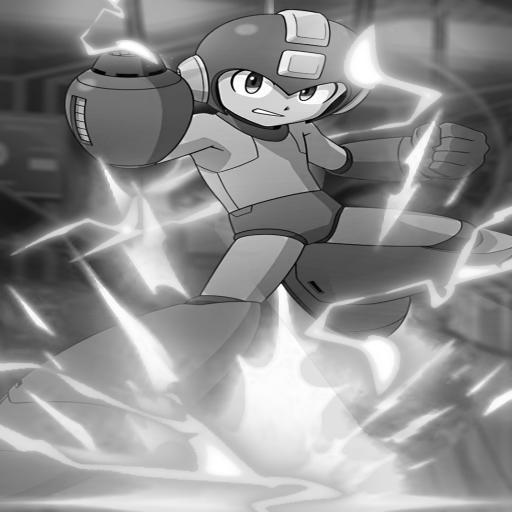

In [ ]:
imagem = image_cinza(cv2.imread('/content/megaman.png'))
print_img(imagem)

## Pontos Salientes

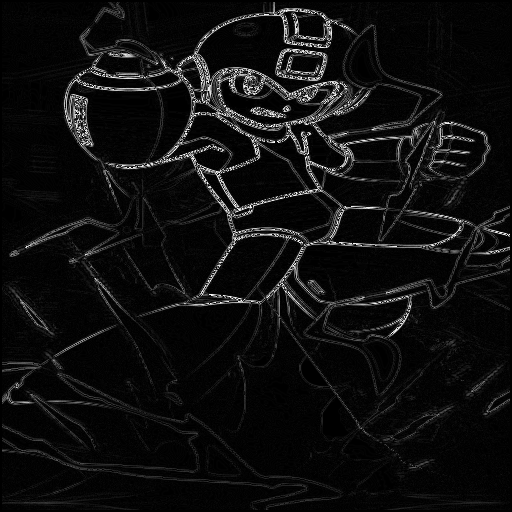

In [ ]:
imagem = image_cinza(cv2.imread('/content/megaman.png'))
kernel = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
def convolve(imagem,kernel):
  blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
  central_point_kernel = len(kernel)//2
  for index_img in range(central_point_kernel,len(imagem) - len(kernel)):
    for index_pixel in range(central_point_kernel,len(imagem[0]) - len(kernel)):
      pixel = Pixel(index_img,index_pixel)
      sum = 0
      for kernel_array in range(0,len(kernel)):
        for kernel_pixel in range(0,len(kernel[0])):
          sum += imagem[pixel.x + kernel_array][pixel.y + kernel_pixel][kernel_pixel] * kernel[kernel_array][kernel_pixel]
      blank_image[pixel.x + central_point_kernel, pixel.y + central_point_kernel] = abs(sum)
  return blank_image

print_img(convolve(imagem,kernel))

## Dilatação

In [ ]:
def limiar(pixel):
  if (pixel > 100):
    return 255
  return 0

In [ ]:
def img_limiar(image):
  new_img_limiar = image
  for index_img,img_array in enumerate(new_img_limiar):
    for index_pixel,pixel in enumerate(img_array):
      for rgb_index,rgb in enumerate(pixel):
        new_img_limiar[index_img][index_pixel] = limiar(rgb)
  return new_img_limiar

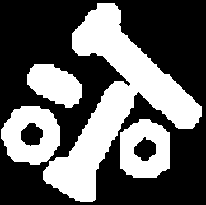

In [ ]:
def dilation(image):
  imagem = img_limiar(image_cinza(image))
  blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
  kernel = np.ones((5,5), np.uint8)
  central_point_kernel = len(kernel)//2
  for index_img in range(central_point_kernel,len(imagem) - len(kernel)):
    for index_pixel in range(central_point_kernel,len(imagem[0]) - len(kernel)):
      array_ponto_central = imagem[index_img][index_pixel]
      if array_ponto_central[0] > 0:                             # Se o ponto central da imagem for > 0
        for kernel_array in range(0,len(kernel)):                # Para cada array do kernel
          for kernel_pixel in range(0,len(kernel[0])):           # Para cada valor do array do kernel
            if (kernel[kernel_array][kernel_pixel] > 0):         # Se for maior que zero
              # Insira na nova imagem o valor do ponto central da imagem.
              blank_image[index_img - central_point_kernel + kernel_array,index_pixel - central_point_kernel + kernel_pixel] = array_ponto_central
  return blank_image

imagem = cv2.imread('/content/ImageSlide.png')
print_img(dilation(imagem))

## Erosão

## Algoritmo informal da erosão binária:

*   Passe o elemento estruturante por todos os pixels da imagem original:
*   Se nenhum valor dos pixels da imagem sob os valores não-nulos
do elemento estruturante for zero,
*    Então, colocar um valor 1 (ou 255) na posição do elemento central da imagem resultado

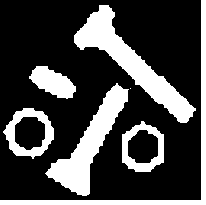

In [ ]:
def erosion(image):
  imagem = img_limiar(image_cinza(image))
  blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
  blank_image.fill(255)
  kernel = np.ones((5,5), np.uint8)
  central_point_kernel = len(kernel)//2

  for index_img in range(0,len(imagem) - len(kernel)):
    for index_pixel in range(0,len(imagem[0]) - len(kernel)):
      pixel = Pixel(index_img,index_pixel)
      for kernel_array in range(0,len(kernel)):
        for kernel_pixel in range(0,len(kernel[0])):
          if kernel[kernel_array,kernel_pixel] == 1 and imagem[pixel.x + kernel_array,pixel.y + kernel_pixel][0] == 0:
            blank_image[pixel.x, pixel.y] = 0
            break;
  return blank_image

imagem = cv2.imread('/content/ImageSlide.png')
print_img(erosion(imagem))

## Opening - suaviza o contorno de uma imagem.
*   Quebra estreitos e elimina proeminências delgadas
*   É usada também para remover ruídos da imagem e abrir pequenos vazios ou espaços entre objetos próximos numa imagem

### Dada por uma erosão seguida de uma dilatação com o mesmo elemento estruturante

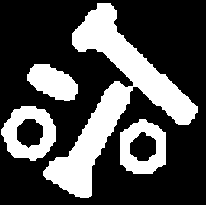

In [ ]:
def opening(image):
  image = erosion(image)
  image = dilation(image)
  return image

print_img(opening(cv2.imread('/content/ImageSlide.png')))

Closing - Funde pequenos quebras e alargas golfos
estreitos
* Elimina pequenos orifícios
* Irá preencher ou fechar os vazios 

Estas operações removem pixels brancos com ruídos

Dada por uma dilatação seguida de uma erosão com o mesmo elemento estruturante

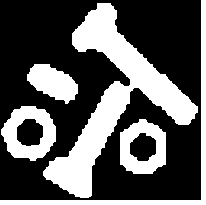

In [ ]:
def closing(image):
  image = dilation(image)
  image = erosion(image)
  return image

print_img(closing(cv2.imread('/content/ImageSlide.png')))